# Novelty and Outlier Detection
Many applications require being able to decide whether a new observation belongs to the same distribution as existing observations (it is an __inlier__), or should be considered as different (it is an __outlier__). Often, this ability is used to clean real data sets. 

Two important distinctions must be made:

- outlier detection:
 	The training data contains outliers which are defined as observations that are far from the others. Outlier detection estimators thus try to fit the regions where the training data is the most concentrated, ignoring the deviant observations.
    
- novelty detection:
 	The training data is not polluted by outliers and we are interested in detecting whether a new observation is an outlier. In this context an outlier is also called a novelty.
    
Outlier detection and novelty detection are both used for __anomaly detection__, where one is interested in detecting abnormal or unusual observations. Outlier detection is then also known as unsupervised anomaly detection and novelty detection as semi-supervised anomaly detection.

In [0]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [0]:
boston = datasets.load_boston()

In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [0]:
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [0]:
X = boston.data
y = boston.target

columns = boston.feature_names

In [0]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
# create the dataframe
boston_df = pd.DataFrame(boston.data)

boston_df.columns = columns

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Features/independent variable will be used to look for any outlier. 

# Discover outliers

## Box plot-

![boxplot.GIF](attachment:boxplot.GIF)

- 5 number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

    - median (Q2/50th Percentile): the middle value of the dataset.

    - 1st quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

    - 3rd quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

    - interquartile range (IQR): 25th to the 75th percentile.

    - whiskers (shown in blue)

    - **outliers** (shown as green circles)

    - “maximum”: Q3 + 1.5*IQR

    - “minimum”: Q1 -1.5*IQR
    
  ![box-dist.GIF](attachment:box-dist.GIF)
  
** 68–95–99.7 rule ** 
 
outliers are the remaining .7% percent of the data.
  
(1) variability 


In [0]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


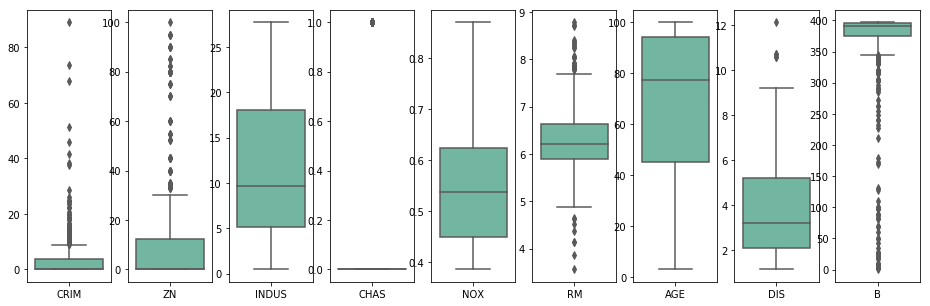

In [0]:
fig, axes = plt.subplots(ncols=9, figsize=(16, 5))

sns.boxplot(data=boston_df[['CRIM']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=boston_df[['ZN']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=boston_df[['INDUS']], palette='Set2', ax=axes[2]);
sns.boxplot(data=boston_df[['CHAS']],  palette='Set2', ax=axes[3]);

sns.boxplot(data=boston_df[['NOX']],   palette='Set2', ax=axes[4]);
sns.boxplot(data=boston_df[['RM']]  ,  palette='Set2', ax=axes[5]);
sns.boxplot(data=boston_df[['AGE']],   palette='Set2', ax=axes[6]);
sns.boxplot(data=boston_df[['DIS']],   palette='Set2', ax=axes[7]);
sns.boxplot(data=boston_df[['B']],     palette='Set2', ax=axes[8]);

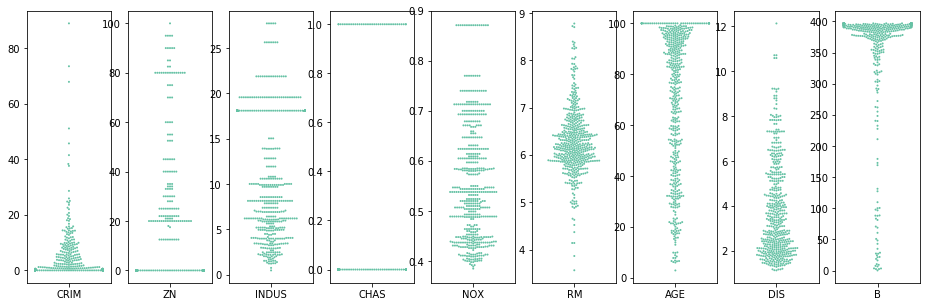

In [0]:
fig, axes = plt.subplots(ncols=9, figsize=(16, 5))
n = 2

sns.swarmplot(data=boston_df[['CRIM']],  palette='Set2', ax=axes[0], size=n);
sns.swarmplot(data=boston_df[['ZN']]  ,  palette='Set2', ax=axes[1], size=n);
sns.swarmplot(data=boston_df[['INDUS']], palette='Set2', ax=axes[2], size=n);
sns.swarmplot(data=boston_df[['CHAS']],  palette='Set2', ax=axes[3], size=n);

sns.swarmplot(data=boston_df[['NOX']],   palette='Set2', ax=axes[4], size=n);
sns.swarmplot(data=boston_df[['RM']]  ,  palette='Set2', ax=axes[5], size=n);
sns.swarmplot(data=boston_df[['AGE']],   palette='Set2', ax=axes[6], size=n);
sns.swarmplot(data=boston_df[['DIS']],   palette='Set2', ax=axes[7], size=n);
sns.swarmplot(data=boston_df[['B']],     palette='Set2', ax=axes[8], size=n);

## Scatter plot-

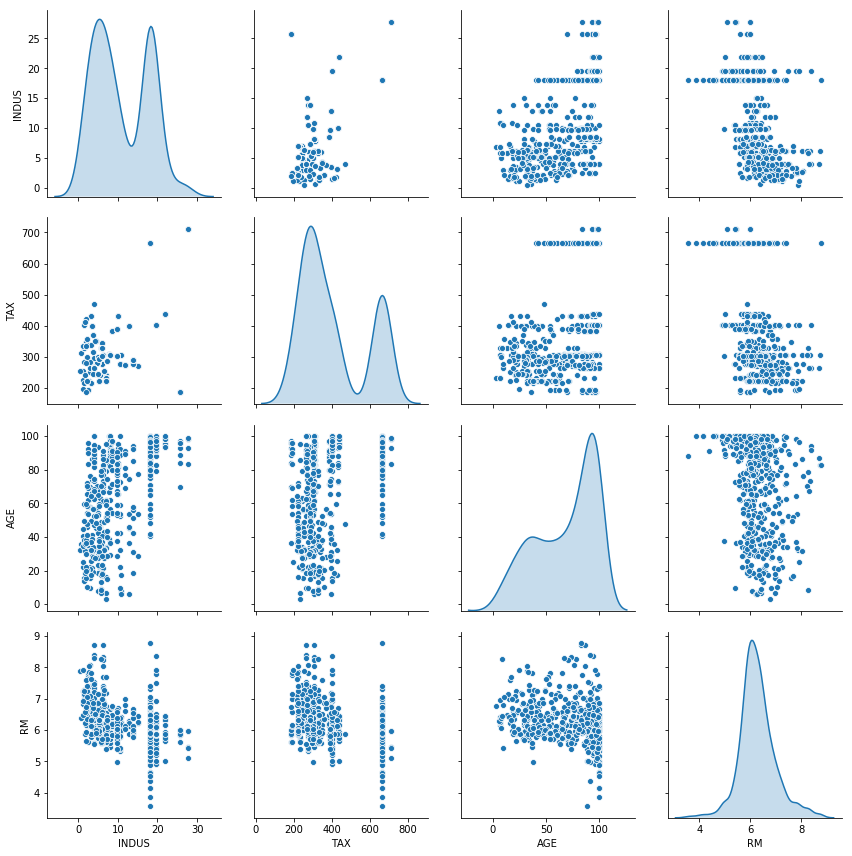

In [0]:
sns.pairplot(data=boston_df[['INDUS', 'TAX', 'AGE', 'RM' ]], height=3, diag_kind='kde');

## Z-Score-
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [0]:
from scipy import stats

In [0]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
z = np.abs(stats.zscore(boston_df))

In [0]:
type(z)

numpy.ndarray

In [0]:
boston_df.shape

(506, 13)

In [0]:
z.shape

(506, 13)

In [0]:
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [0]:
threshold = 3

result = np.where(z > 3)
result

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
        220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
        277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
        357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
        380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
        416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
        437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
         5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
         3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
         0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
        11,  0, 11, 11, 11, 11, 11, 11, 1

In [0]:
len(result[0]), len(result[1])

(100, 100)

In [0]:
outlier_df = pd.DataFrame(data=result[0], columns=['ROWNUM'])

outlier_df['COLNUM'] = result[1]
outlier_df.head()

,ROWNUM,COLNUM
0,55,1
1,56,1
2,57,1
3,102,11
4,141,12


In [0]:
np.unique(outlier_df['COLNUM'].values)

array([ 0,  1,  3,  5,  7, 11, 12], dtype=int64)

In [0]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
# how many outliers per column
outlier_df.COLNUM.value_counts()

3     35
11    25
1     14
5      8
0      8
12     5
7      5
Name: COLNUM, dtype: int64

## IQR score -



In [0]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


we will get IQR for each column.

# Example 2

#### Parametric methods: Univariate
Create a dummy dataframe where features have normal distributions to practice parametric methods.

In [0]:
# seed for reproducibility
np.random.seed(42)

n_feats=4

# dummydf = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, n_feats)),
#                        columns=['feature{}'.format(i) for i in range(n_feats)])

dummydf = pd.DataFrame(np.random.normal(scale=10.0, 
                                        size=(1000, n_feats)),
                       columns=['feature0', 'feature1', 'feature3', 'features4' ])

In [0]:
dummydf.head(5)

,feature0,feature1,feature3,features4
0,4.967142,-1.382643,6.476885,15.230299
1,-2.341534,-2.341370,15.792128,7.674347
2,-4.694744,5.425600,-4.634177,-4.657298
3,2.419623,-19.132802,-17.249178,-5.622875
4,-10.128311,3.142473,-9.080241,-14.123037


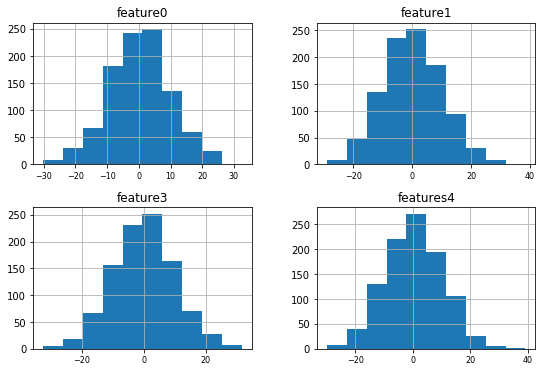

In [0]:
# all normally distributed
dummydf.hist(figsize=(9,6), xlabelsize = 8);

In [0]:
# # enough variation between features to show outliers
dummydf.describe()

,feature0,feature1,feature3,features4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.306239,0.248285,-0.082552,0.300861
std,9.639191,10.118843,10.060754,10.069640
min,-30.195122,-28.962554,-32.412673,-29.911360
25%,-6.129422,-6.770368,-6.752986,-6.708710
50%,0.561874,0.202097,-0.075088,0.211577
75%,6.648813,6.938808,6.422820,6.958780
max,32.430930,38.527315,31.520567,39.262377


#### Define two functions that statistically identify outliers in a pandas Series using a standard deviation and interquartile range method.

In [0]:
def out_std(s, nstd=3.0):
    # , return_thresholds=False
    
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    
    param nstd:
        Set number of standard deviations from the mean to consider an outlier
        :type nstd: ``float``
    
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
        :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    
    cut_off = data_std * nstd
    
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     if return_thresholds:
#         return lower, upper
#     else:
#         return [True if x < lower or x > upper else False for x in s]
    return lower, upper, [True if x < lower or x > upper else False for x in s]

In [0]:
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

#### Standard Deviation method

In [0]:
# outlier_mask is a boolean list identifies the indices of the outliers
lower, upper, outlier_mask = out_std(dummydf['feature0'], nstd=3)

# first 10 elements
print(lower, upper)
outlier_mask[:10]

-28.611334931388793 29.223813199865955


[False, False, False, False, False, False, False, False, False, False]

In [0]:
# get all the outlier data

#dummydf['feature0'][outlier_mask]
dummydf.loc[outlier_mask, ['feature0']]

,feature0
506,-30.195122
788,-29.069882
929,32.430930


In [0]:
# python list gets the first index
outlier_mask.index(True)

506

In [0]:
# convert the outlier_mask to numpy array
np_outlier_mask = np.array(outlier_mask)

np.where(np_outlier_mask == True)

(array([506, 788, 929], dtype=int64),)

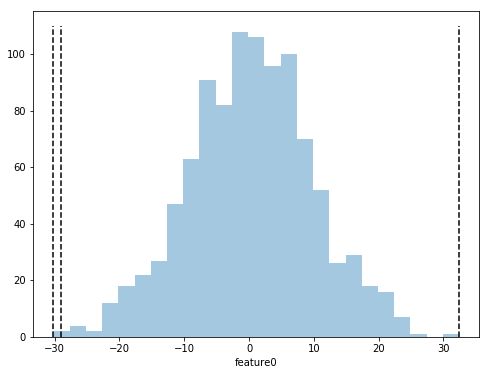

In [0]:
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');